<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#nd2reader" data-toc-modified-id="nd2reader-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>nd2reader</a></span></li><li><span><a href="#pims-ND2_Reader" data-toc-modified-id="pims-ND2_Reader-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>pims ND2_Reader</a></span></li><li><span><a href="#List-all-nd2-files-in-a-folder-tree-to-an-excel-spreadsheet" data-toc-modified-id="List-all-nd2-files-in-a-folder-tree-to-an-excel-spreadsheet-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>List all nd2 files in a folder tree to an excel spreadsheet</a></span></li><li><span><a href="#Loop-the-above-script-for-many-directories" data-toc-modified-id="Loop-the-above-script-for-many-directories-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Loop the above script for many directories</a></span></li><li><span><a href="#Loading-a-nd2-file-with-its-metadata" data-toc-modified-id="Loading-a-nd2-file-with-its-metadata-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Loading a nd2 file with its metadata</a></span></li><li><span><a href="#Loading-only-the-metadata-of-an-nd2-file" data-toc-modified-id="Loading-only-the-metadata-of-an-nd2-file-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Loading only the metadata of an nd2 file</a></span></li></ul></div>

# nd2_handling v0.0.1 readme

### Description

This is a module with scripts related to handling nd2 files. You can use it to load nd2 files and their metadata. You can also use it to gather all metadata of a folder tree into an excel sheet. If any of the metadata you need is not being gathered, please tell me and I can make sure it is added.

### Dependencies

**In order for this script to work, you need to install the following modules:**

- pip install nd2reader
- pip install pims-nd2

**You also need the more general modules pandas and numpy:**
- pip install pandas
- pip install numpy

**Version info**:
- pims-nd2        >= 1.1, < 2
- nd2reader        >= 3.3.0, < 4
- pandas        >= 1.3.3,   < 2
- numpy             >= 1.19,  < 2


# What metadata is available?

There are two libraries I use that can read nd2 metadata, nd2reader and pims. The following code will extract metadata using them separately:

### nd2reader

https://rbnvrw.github.io/nd2reader/tutorial.html#nd2-metadata

In [10]:
import os
file_path = r'E:\DNA waves project\Polarisation exp\2021-06-03_lambda_400nguL_1_200\100mbar\100xOil_100mbar_pol-none_mid_solis100_019.nd2'

from nd2reader import ND2Reader

with ND2Reader(file_path) as img:
    print('All metadata:')
    frame_rate = img.frame_rate
    time_steps = img.get_timesteps()
    print(img.get_timesteps())
    print(img.pixel_type)
    print(img.events)
    exposure_times = img.parser._raw_metadata.camera_exposure_time
    avg_exposure_time = np.mean(exposure_times)
    acquisition_times = img.parser._raw_metadata.acquisition_times
    print("\n{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in img.metadata.items() if (not k=='z_coordinates')) + "}") 
    print('\n')
    print(img.sizes)


All metadata:
[   47.74687839    54.95070839    62.15453839 ... 22768.6266984
 22775.8305284  22783.0343584 ]
<class 'numpy.float64'>
[{'index': 1, 'time': 7.10418841894716, 'type': 7, 'name': 'Command Executed'}, {'index': 2, 'time': 30161.892754001543, 'type': 7, 'name': 'Command Executed'}]

{'height': 124,
'width': 512,
'date': None,
'fields_of_view': [0],
'frames': range(0, 3846),
'z_levels': [],
'total_images_per_channel': 3157,
'channels': ['Mono'],
'pixel_microns': 0.817760914884417,
'num_frames': 3846,
'experiment': {'description': 'DNA DLD', 'loops': [{'start': 0, 'duration': 0, 'stimulation': False, 'sampling_interval': 0.0}]},
'events': [{'index': 1, 'time': 7.10418841894716, 'type': 7, 'name': 'Command Executed'}, {'index': 2, 'time': 30161.892754001543, 'type': 7, 'name': 'Command Executed'}],}


{'x': 512, 'y': 124, 't': 3846}


### pims ND2_Reader

https://pypi.org/project/pims-nd2/

In [1]:
from pims import ND2_Reader #does not work for files with 3846 frames
file_path = r'E:\DNA waves project\Polarisation exp\2021-06-16_lambda_400nguL_1_200_optosplit\100xOil_500mbar_C2017_sola100_010.nd2'
try:
    with ND2_Reader(file_path) as frames:
    #frames[82]  # display frame 82
        print('All metadata:')
        print("{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in frames.metadata.items()) + "}")
        print('\n\nSingle frame Metadata:')
        print("{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in frames[5].metadata.items()) + "}")

        # for f in frames:
        #     print(f.metadata['t_ms'])

        frames.close()
except:
    print('Caught an error')
finally:
    print('')

C:\Users\os4875st\Anaconda3\lib\site-packages\pims\api.py:119: UserWarning: 'ND2_Reader' has been renamed to 'ND2Reader_SDK' and will beremoved in future pims versions. Please use the new name, or try out the pure-Python one named `ND2Reader`.
  warn("'ND2_Reader' has been renamed to 'ND2Reader_SDK' and will be"


All metadata:
{'width': 378,
'width_bytes': 756,
'height': 92,
'components': 1,
'bitsize_memory': 16,
'bitsize_significant': 16,
'sequence_count': 4935,
'tile_width': 378,
'tile_height': 92,
'compression': None,
'compression_quality': 4294967197,
'plane_count': 1,
'angle': 0.0,
'calibration_um': 0.817760914884417,
'time_start_jdn': 2459382.0763742593,
'time_start': datetime.datetime(2021, 6, 16, 15, 49, 58, 736005),
'time_start_utc': datetime.datetime(2021, 6, 16, 13, 49, 58, 736005),
'objective': 'S Plan Fluor ELWD 20x DIC N1',
'magnification': -1.0,
'NA': 0.45,
'refractive_index1': 1.0,
'refractive_index2': 1.0,
'pinhole': 0.0,
'zoom': 1.0,
'projective_mag': -1.0,
'image_type': 'normal',
'z_home': None,
'frame_rate': 164.799760051555,
'plane_0': {'components': 1, 'rgb_value': (1.0, 1.0, 1.0), 'name': 'New', 'oc': '1x1 bin', 'emission_nm': 0.0},}


Single frame Metadata:
{'x_um': 1304.927978515625,
'y_um': -4146.3232421875,
'z_um': 1.41650028,
't_ms': 99.01787459850311,
'colors': [(1.

C:\Users\os4875st\Anaconda3\lib\site-packages\pims\base_frames.py:472: UserWarning: Please call FramesSequenceND.__init__() at the start of thethe reader initialization.
  warn("Please call FramesSequenceND.__init__() at the start of the"


# Using nd2_handling.py

### List all nd2 files in a folder tree to an excel spreadsheet

In [7]:
import nd2_handling
import importlib
importlib.reload(nd2_handling)

#Set the path of the experiment directory
dir_path = r'E:\DNA waves project\Higher viscosity waves\2021-10-25 40% sucrose 50 nguL'
nd2_handling.nd2_file_infos_to_spreadsheet(dir_path, read_time_steps=False, read_xy_pos=False, read_file_name_info=True)

module ND2Reader caught an error for the file (ignoring this file)
	E:\DNA waves project\Higher viscosity waves\2021-10-25 40% sucrose 50 nguL\bg\100x_sola100_034.nd2
	 Exposure time will not be extracted
module ND2Reader caught an error for the file (ignoring this file)
	E:\DNA waves project\Higher viscosity waves\2021-10-25 40% sucrose 50 nguL\bg\100x_withoutBF_sola100_037.nd2
	 Exposure time will not be extracted
module ND2Reader caught an error for the file (ignoring this file)
	E:\DNA waves project\Higher viscosity waves\2021-10-25 40% sucrose 50 nguL\bg\10x_sola100_035.nd2
	 Exposure time will not be extracted
module ND2Reader caught an error for the file (ignoring this file)
	E:\DNA waves project\Higher viscosity waves\2021-10-25 40% sucrose 50 nguL\bg\20x_sola100_036.nd2
	 Exposure time will not be extracted
module ND2Reader caught an error for the file (ignoring this file)
	E:\DNA waves project\Higher viscosity waves\2021-10-25 40% sucrose 50 nguL\PIV_two-color\1000mbar\100x_1

### Loop the above script for many directories

In [18]:
#Set the path of the main directory
dir_main = r'E:\DNA waves project\Polarisation exp'

nd2_handling.get_nd2_lists_for_all_subfolders(dir_main, read_file_name_info=True)

Handling 2021-06-02_lambda_50nguL_YOYO-3
Handling 2021-06-03 calibration
ND2Reader caught an error for file (ignoring this file)
	E:\DNA waves project\Polarisation exp\2021-06-03 calibration\10x_in_001.nd2
ND2Reader caught an error for file (ignoring this file)
	E:\DNA waves project\Polarisation exp\2021-06-03 calibration\10x_out_001.nd2
Handling 2021-06-03_lambda_400nguL_1_200
Caught an error for file (ignoring this file)
	E:\DNA waves project\Polarisation exp\2021-06-03_lambda_400nguL_1_200\100mbar\100xOil_100mbar_pol-none_mid_solis100_019.nd2

	frames =  3157
ND2Reader caught an error for file (ignoring this file)
	E:\DNA waves project\Polarisation exp\2021-06-03_lambda_400nguL_1_200\bg\10x_solis100_039.nd2
ND2Reader caught an error for file (ignoring this file)
	E:\DNA waves project\Polarisation exp\2021-06-03_lambda_400nguL_1_200\bg\20x_solis100_040.nd2
Handling 2021-06-07_lambda_40nlul_Y3_1_10_prepforsted
ND2Reader caught an error for file (ignoring this file)
	E:\DNA waves proje

### Loading a nd2 file with its metadata

	Reading file 100xOil_500mbar_C2017_sola100_010.nd2 in folder 2021-06-16_lambda_400nguL_1_200_optosplit
	Read 4935 uint16 frame(s) from 100xOil_500mbar_C2017_sola100_010.nd2 in 8.90 seconds
Video(4935, 92, 378):
	- file_path: E:\DNA waves project\Polarisation exp\2021-06-16_lambda_400nguL_1_200_optosplit\100xOil_500mbar_C2017_sola100_010.nd2
	- dir_file: E:\DNA waves project\Polarisation exp\2021-06-16_lambda_400nguL_1_200_optosplit
	- file_name: 100xOil_500mbar_C2017_sola100_010.nd2
	- file_name0: 100xOil_500mbar_C2017_sola100_010
	- str_contains_img: (4935, 92, 378)
	- parent_folder: 2021-06-16_lambda_400nguL_1_200_optosplit
	- avg_exposure_time_ms: 4.32
	- mag: 100x
	- p: 500
	- file_nbr: 010
	- light_source: sola
	- light_source_intensity: 100.0
	- frame_rate: 164.8
	- time_start: 2021-06-16 15:49:58.736005
	- bit_depth: 16
	- width: 378
	- height: 92
	- n_frames: 4935
	- shape: (4935, 92, 378)
	- time_s: 30.0
	- x_um_frame0: 1304.927978515625
	- y_um_frame0: -4146.3232421875
	- sc

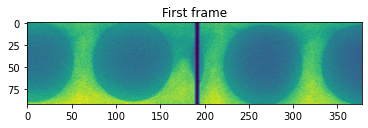

frame_rate =  164.8
height =  92


In [3]:
importlib.reload(nd2_handling)
import matplotlib.pyplot as plt

#Set the path of the nd2-file:
nd2_file_path = r'E:\DNA waves project\Polarisation exp\2021-06-16_lambda_400nguL_1_200_optosplit\100xOil_500mbar_C2017_sola100_010.nd2'

#Load the nd2 file
v = nd2_handling.Video(nd2_file_path, read_img_directly=True, frame_range = [0,0])

#Print all the information containing all the attributes of the object
print(v)

#Display the first frame of the image stack
plt.imshow(v.img[0])
plt.title('First frame')
plt.show()

#Access the attributes:
print('frame_rate = ', v.frame_rate)
print('height = ', v.height)

### Loading only the metadata of an nd2 file 

In [2]:
import importlib
import nd2_handling
importlib.reload(nd2_handling)

#Set the path of the nd2-file:
nd2_file_path = r'E:\DNA waves project\Polarisation exp\2021-06-16_lambda_400nguL_1_200_optosplit\100xOil_500mbar_C2017_sola100_010.nd2'

#Load the nd2 file without its metadata
v = nd2_handling.Video(nd2_file_path, read_img_directly=False)
print(v)

#Access the attributes:
print('\nframe_rate = ', v.frame_rate)
print('height = ', v.height)

Video(empty):
	- file_path: E:\DNA waves project\Polarisation exp\2021-06-16_lambda_400nguL_1_200_optosplit\100xOil_500mbar_C2017_sola100_010.nd2
	- dir_file: E:\DNA waves project\Polarisation exp\2021-06-16_lambda_400nguL_1_200_optosplit
	- file_name: 100xOil_500mbar_C2017_sola100_010.nd2
	- file_name0: 100xOil_500mbar_C2017_sola100_010
	- str_contains_img: (empty)
	- parent_folder: 2021-06-16_lambda_400nguL_1_200_optosplit
	- avg_exposure_time_ms: 4.32
	- mag: 100x
	- p: 500
	- file_nbr: 010
	- light_source: sola
	- light_source_intensity: 100.0
	- frame_rate: 164.8
	- time_start: 2021-06-16 15:49:58.736005
	- bit_depth: 16
	- width: 378
	- height: 92
	- n_frames: 4935
	- shape: (4935, 92, 378)
	- time_s: 30.0
	- x_um_frame0: 1304.927978515625
	- y_um_frame0: -4146.3232421875
	- scale_pix_per_um: 6.25

frame_rate =  164.8
height =  92


C:\Users\os4875st\Anaconda3\lib\site-packages\pims\api.py:119: UserWarning: 'ND2_Reader' has been renamed to 'ND2Reader_SDK' and will beremoved in future pims versions. Please use the new name, or try out the pure-Python one named `ND2Reader`.
  warn("'ND2_Reader' has been renamed to 'ND2Reader_SDK' and will be"
C:\Users\os4875st\Anaconda3\lib\site-packages\pims\base_frames.py:472: UserWarning: Please call FramesSequenceND.__init__() at the start of thethe reader initialization.
  warn("Please call FramesSequenceND.__init__() at the start of the"
